Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Classes: ['malignant' 'benign']
Primeiras 5 amostras:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4

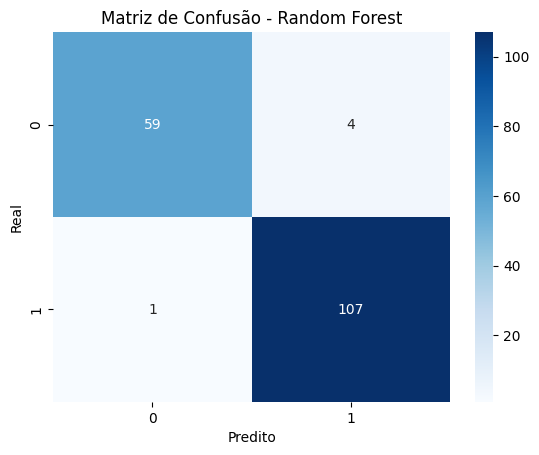

In [11]:
# Importações de bibliotecas
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Carregar e Explorar o Dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

print("Features:", data.feature_names)
print("Classes:", data.target_names)
print("Primeiras 5 amostras:")
print(X.head())

# Pré-processamento dos Dados
# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar valores nulos
print("Valores nulos no dataset:", X.isnull().sum().sum())

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar o Modelo Random Forest
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

# Avaliar Random Forest
print("Random Forest:")
print("Acurácia:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

# Contagem de tumores benignos e malignos
benign_count = sum(y == 1)
malignant_count = sum(y == 0)
print(f"Quantidade de tumores benignos: {benign_count}")
print(f"Quantidade de tumores malignos: {malignant_count}")


# Avaliação do Modelo
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

# Matriz de confusão para Random Forest
plot_confusion_matrix(y_test, y_pred_forest, "Matriz de Confusão - Random Forest")



